In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

# Part 1

In [7]:
# Load data
houses = pd.read_csv("data_assignment2.csv")
houses

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
5,6,133,6.0,823.0,NaN,12,6650000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
9,10,133,6.0,1503.0,NaN,51,3000000


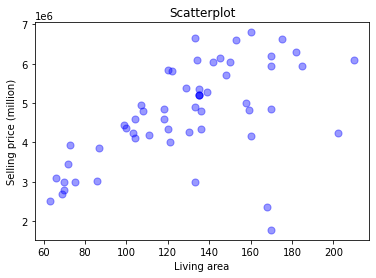

In [8]:
# Scatter plot living area vs prices
plt.scatter(houses[['Living_area']], houses[['Selling_price']],  c = 'b', s = 50, alpha = 0.4)
plt.title('Scatterplot')
plt.xlabel('Living area')
plt.ylabel('Selling price (million)')
plt.show()

In [9]:
# Check for NaN
houses[['Living_area','Selling_price']].isnull().values.any()

False

In [10]:
# Fit linear regression model area and price
model = LinearRegression().fit(houses[['Living_area']], houses[['Selling_price']])

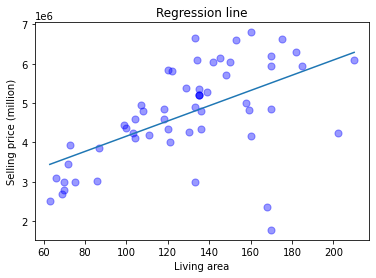

In [11]:
# Plot data and fit
xfit=np.linspace(min(houses['Living_area']),max(houses['Living_area']), 1000) #1000 evenly spaced points in [0, 55].
yfit=model.predict(xfit[:, np.newaxis])
plt.scatter(houses[['Living_area']], houses[['Selling_price']], c = 'b', s = 50, alpha = 0.4)
plt.plot(xfit, yfit)
plt.title('Regression line')
plt.xlabel('Living area')
plt.ylabel('Selling price (million)')
plt.show()

Text(0, 0.5, 'Residuals')

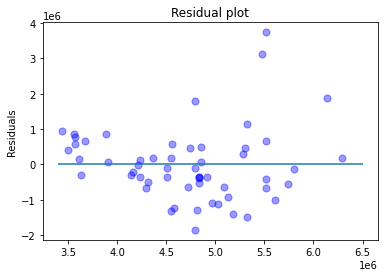

In [12]:
# Residual plot
pred_price = model.predict(houses[['Living_area']])
residuals = pred_price - houses[['Selling_price']]
plt.scatter(pred_price, residuals, c = 'b', s = 50, alpha = 0.4)
plt.hlines(y = 0, xmin = 3400000, xmax = 6500000)
plt.title('Residual plot')
plt.ylabel('Residuals')

In [13]:
# Extract indicies of outliers > |1 700 00|
outliers_ind = residuals[abs(residuals) > 1700000].dropna()
outliers_ind = outliers_ind.index
outliers_ind

Int64Index([5, 9, 24, 40, 45], dtype='int64')

In [14]:
# Remove indicies from data
houses = houses.drop(houses.index[outliers_ind])
houses

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
10,11,121,4.0,1575.0,112.0,81,4000000
11,12,136,6.0,381.0,NaN,42,4350000


In [15]:
# New model linear regression area and price
model = LinearRegression().fit(houses[['Living_area']], houses[['Selling_price']])

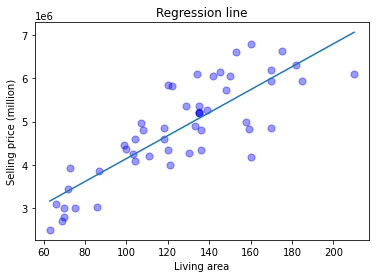

In [16]:
# Scatter plot of data and fitted model
xfit=np.linspace(min(houses['Living_area']),max(houses['Living_area']), 1000) #1000 evenly spaced points in [0, 55].
yfit=model.predict(xfit[:, np.newaxis])
plt.scatter(houses[['Living_area']], houses[['Selling_price']], c = 'b', s = 50, alpha = 0.4)
plt.plot(xfit, yfit)
plt.title('Regression line')
plt.xlabel('Living area')
plt.ylabel('Selling price (million)')
plt.show()

In [17]:
# Slope
print(model.coef_)

# Intersection
print(model.intercept_)

[[26493.0947257]]
[1496944.97559781]


In [18]:
# Output of predictions: area 100^2, 150^2 and 200^2 
print(model.predict([[100]]))
print(model.predict([[150]]))
print(model.predict([[200]]))

[[4146254.4481683]]
[[5470909.18445355]]
[[6795563.9207388]]


Text(0, 0.5, 'Residuals')

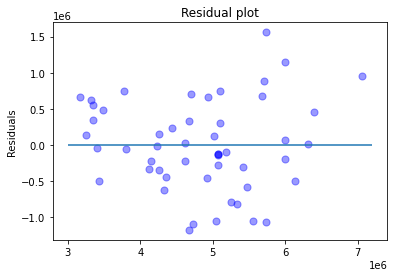

In [19]:
# Residual plot new model
pred_price = model.predict(houses[['Living_area']])
residuals = pred_price - houses[['Selling_price']]
plt.scatter(pred_price, residuals, c = 'b', s = 50, alpha = 0.4)
plt.hlines(y = 0, xmin = 3000000, xmax = 7200000)
plt.title('Residual plot')
plt.ylabel('Residuals')


# Part 2

In [20]:
# load iris data and create dataframe
from sklearn.datasets import load_iris
iris_raw = load_iris()
iris_raw

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [21]:
iris = pd.DataFrame(iris_raw.data , columns = iris_raw.feature_names)
iris['species'] = iris_raw.target 
iris['species'] = iris['species'].replace(to_replace= [0, 1, 2], 
value = ['setosa', 'versicolor', 'virginica'])

iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


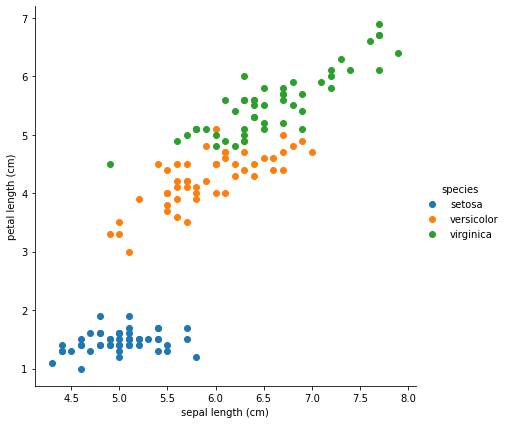

In [22]:
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal length (cm)',
                              'petal length (cm)').add_legend()

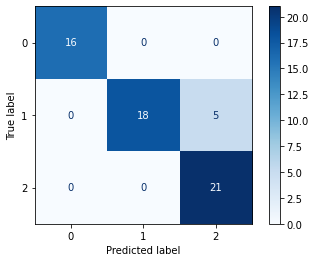

In [33]:
# Split into trainging and test sets
x_train, x_test, y_train, y_test = train_test_split(iris_raw.data, 
                                                    iris_raw.target, 
                                                    test_size=0.4, random_state=0)

logReg = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit logistic regression model to training data
model = logReg.fit(x_train, y_train)

# PLot confusion matrix
plot_confusion_matrix(model,x_test,y_test, cmap='Blues')


In [34]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
#%%

y_pred = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))   

plot_confusion_matrix(model_knn,x_test,y_test, cmap='Blues')


NameError: name 'metrics' is not defined